### First making clean folder to train and test data 

In [ ]:
import pandas as pd 
import os 
import random
import shutil


In [5]:
import os

new_folder_name = 'Data'

try:
    # Create the new folder
    os.mkdir(new_folder_name)
    print(f"Folder '{new_folder_name}' created successfully.")
except OSError as e:
    print(f"Error: {e}")


Folder 'Data' created successfully.


In [7]:

data_folder = 'Data'
train_folder = 'train'
test_folder = 'test'

try:
    
    
    
    os.mkdir(os.path.join(data_folder, train_folder))
    os.mkdir(os.path.join(data_folder, test_folder))

    print(f"Folders '{train_folder}' and '{test_folder}' created inside '{data_folder}'.")
except OSError as e:
    print(f"Error: {e}")


Folders 'train' and 'test' created inside 'Data'.


In [8]:
data_folder1 = 'Data/train'
data_folder2 = 'Data/test'
yes = 'yes'
no = 'no'

try:
    
    
    
    os.mkdir(os.path.join(data_folder1, yes))
    os.mkdir(os.path.join(data_folder1, no))
    
    os.mkdir(os.path.join(data_folder2, yes))
    os.mkdir(os.path.join(data_folder2, no))

    
except OSError as e:
    print(f"Error: {e}")

In [11]:


def distribute_images(src_folder, train_folder, test_folder , category, split_ratio=0.9):
    # List all the images in the source folder
    image_files = os.listdir(src_folder)
    total_images = len(image_files)

    
    num_train_images = int(total_images * split_ratio)
    num_test_images = total_images - num_train_images

    
    random.shuffle(image_files)

    
    train_images = image_files[:num_train_images]
    test_images = image_files[num_train_images:]

    
    train_category_folder = os.path.join(train_folder, category)
    test_category_folder = os.path.join(test_folder, category)
    os.makedirs(train_category_folder, exist_ok=True)
    os.makedirs(test_category_folder, exist_ok=True)

    
    for image in train_images:
        src_path = os.path.join(src_folder, image)
        dest_path = os.path.join(train_category_folder, image)
        shutil.copy(src_path, dest_path)

    for image in test_images:
        src_path = os.path.join(src_folder, image)
        dest_path = os.path.join(test_category_folder, image)
        shutil.copy(src_path, dest_path)

if __name__ == "__main__":
    
    src_no_folder = "Brain Tumour Dataset/no"
    src_yes_folder = "Brain Tumour Dataset/yes"
    train_folder = "Data/train"
    test_folder = "Data/test"

    
    distribute_images(src_no_folder, train_folder, test_folder, "no")

    
    distribute_images(src_yes_folder, train_folder, test_folder, "yes")




## Creating Dataset to model 

In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 

import os 
import random 
import cv2 
from PIL import Image 

from tensorflow.keras.layers import Dense, Conv2D, Input, Dropout
from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import optimizers

import keras 
from tensorflow.keras.regularizers import l2,l1
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import sklearn 
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf


In [26]:
img_height= 180
img_width = 180 
batch_size = 32
datagen_train = ImageDataGenerator(horizontal_flip = True, rescale=1.0/255)
datagen_train = ImageDataGenerator(horizontal_flip=True, rescale = 1.0/255)
train_generator = datagen_train.flow_from_directory(
    "Data/train/",
    target_size=(img_height, img_width),  
    color_mode = "grayscale",
    batch_size = batch_size,
    class_mode = "categorical",
    shuffle = True
)

validation_generator = datagen_train.flow_from_directory(
    "Data/test/",
    target_size=(img_height, img_width),  
    color_mode = "grayscale",
    batch_size = batch_size,
    class_mode = "categorical",
    shuffle = True
    
)


Found 2700 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


## Model Building 

In [27]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x


def model_eye_det(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,64,(3,3))
    conv_2 = Convolution(conv_1,128,(3,3))
    conv_3 = Convolution(conv_2,256,(3,3))
    conv_4 = Convolution(conv_3,256,(3,3))

    flatten = Flatten()(conv_4)
    
    dense_1 = Dense_f(flatten,128)
    dense_2 = Dense_f(dense_1,256)

    output  = Dense(2, activation="softmax")(dense_2)
    model  =  Model(inputs=[inputs],outputs = [output])
    
    opt = Adam(learning_rate = 0.0001)
    
    model.compile(loss=['categorical_crossentropy'] , optimizer = opt , metrics =["accuracy"])

    return model


In [28]:
model = model_eye_det((180,180,1))
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 1)]     0         
                                                                 
 conv2d_19 (Conv2D)          (None, 180, 180, 64)      640       
                                                                 
 batch_normalization_26 (Bat  (None, 180, 180, 64)     256       
 chNormalization)                                                
                                                                 
 activation_26 (Activation)  (None, 180, 180, 64)      0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 90, 90, 64)       0         
 g2D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 90, 90, 64)        0   

In [29]:
epochs = 10
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("tumour_weights.h5", monitor='val_accuracy', save_weights_only = True, mode = 'max',verbose =1)
reduce_lr = ReduceLROnPlateau(moniter = 'val_loss', factor = 0.1, patience = 2, min_lr = 0.0001)
callbacks = [checkpoint, reduce_lr]

In [30]:
history = model.fit(
    x = train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = callbacks)

Epoch 1/10
84/84 [==============================] - ETA: 0s - loss: 0.5992 - accuracy: 0.7208
Epoch 1: saving model to tumour_weights.h5
84/84 [==============================] - 464s 5s/step - loss: 0.5992 - accuracy: 0.7208 - val_loss: 0.7583 - val_accuracy: 0.5104 - lr: 1.0000e-04
Epoch 2/10
84/84 [==============================] - ETA: 0s - loss: 0.4710 - accuracy: 0.7815
Epoch 2: saving model to tumour_weights.h5
84/84 [==============================] - 811s 10s/step - loss: 0.4710 - accuracy: 0.7815 - val_loss: 0.8385 - val_accuracy: 0.5035 - lr: 1.0000e-04
Epoch 3/10
84/84 [==============================] - ETA: 0s - loss: 0.3995 - accuracy: 0.8133
Epoch 3: saving model to tumour_weights.h5
84/84 [==============================] - 431s 5s/step - loss: 0.3995 - accuracy: 0.8133 - val_loss: 0.7731 - val_accuracy: 0.5035 - lr: 1.0000e-04
Epoch 4/10
84/84 [==============================] - ETA: 0s - loss: 0.3288 - accuracy: 0.8486
Epoch 4: saving model to tumour_weights.h5
84/84 [===

In [31]:
model.evaluate(validation_generator)

10/10 [==============================] - 13s 1s/step - loss: 0.3848 - accuracy: 0.8467


[0.384780615568161, 0.846666693687439]

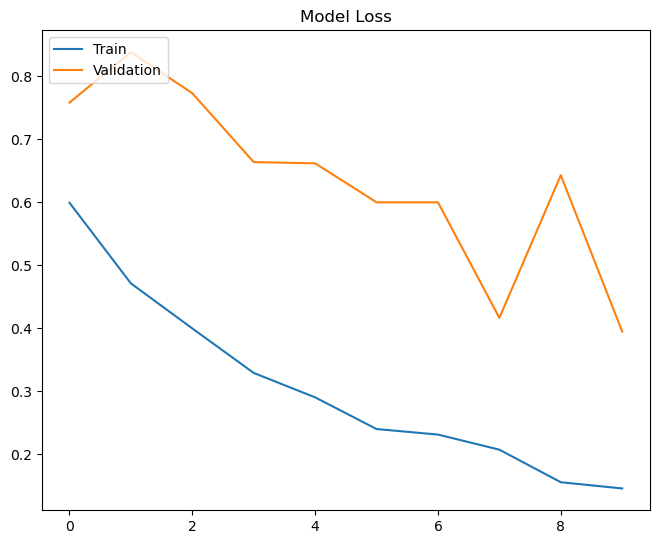

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

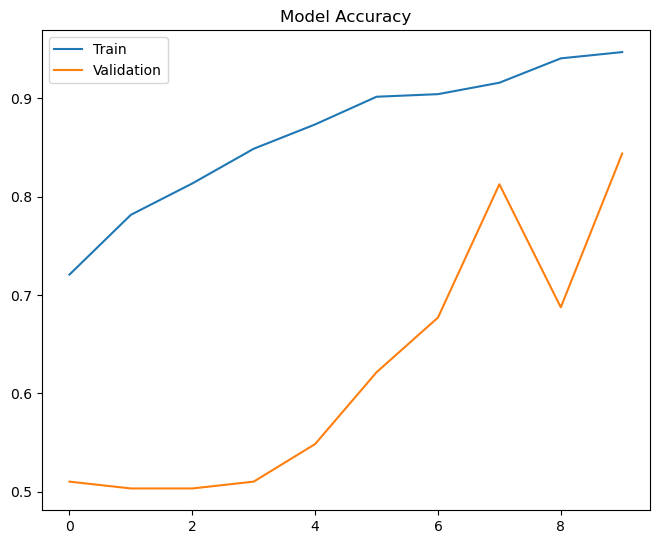

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [34]:
model_json = model.to_json()
with open("tumour_model_a.json","w") as json_file:
    json_file.write(model_json)